## Exercise 5 - Solution

In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = [16,6]

In [7]:
# Read a CSV file into a Pandas DataFrame
PATH='data/rossmann'
store_df = pd.read_csv(f'{PATH}/store.csv')
sales_df = pd.read_csv(f'{PATH}/train.csv', dtype={'StateHoliday':np.object}, parse_dates=['Date'])

In [8]:
# Calculate CompetitionOpenSince date from month and year columns
store_df['CompetitionOpenSince'] = pd.to_datetime(dict(year=store_df.CompetitionOpenSinceYear, month=store_df.CompetitionOpenSinceMonth, day=1))
# Fill missing CompetitionDistance values with average value of all distances
mean = store_df.CompetitionDistance.mean()
store_df.CompetitionDistance.fillna(mean, inplace=True)
# Fill missing CompetitionOpenSince values with today's date
store_df.CompetitionOpenSince.fillna(pd.datetime.today(), inplace=True)
# Replace StateHoliday categories a, b, c with 1 and convert to int32
sales_df['StateHolidayInt'] = sales_df.StateHoliday.replace(['a','b','c'], 1)
sales_df['StateHolidayInt'] = sales_df['StateHolidayInt'].astype(np.int32)
# Join store type, assortment, distance and open since from store df to sales df
merged_df = pd.merge(left=sales_df, right=store_df[['Store','StoreType','Assortment','CompetitionDistance','CompetitionOpenSince']], on='Store')
# Test: Categorize store type and assortment
merged_df['StoreTypeCat'] = merged_df.StoreType.astype('category').cat.codes
merged_df['AssortmentCat'] = merged_df.Assortment.astype('category').cat.codes

In [18]:
# Set the 'Date' column as index
ts_df = merged_df.set_index('Date')

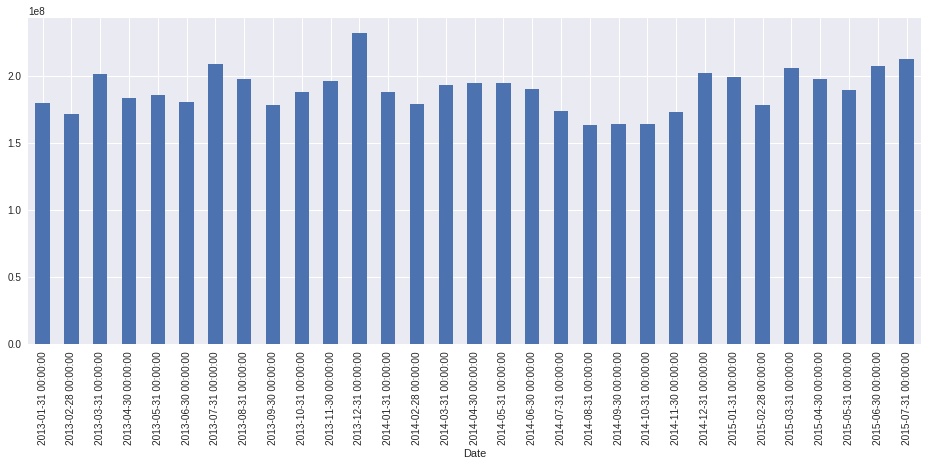

In [19]:
# Sales per month
ts_df['Sales'].resample('1M').sum().plot(kind='bar');
# Alternaive:
#merged_df[['Date','Sales']].groupby(['Date'])['Sales'].sum().resample('1M').sum().plot.bar();

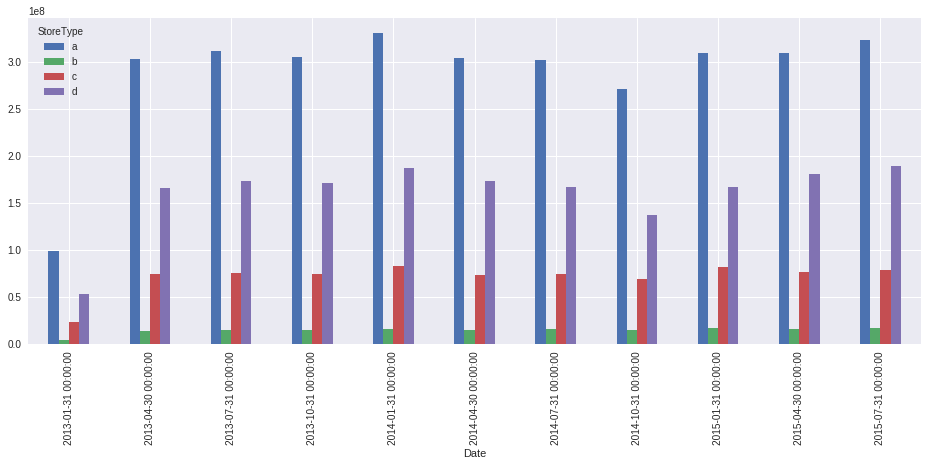

In [22]:
# Sales per quarter, grouped by store type
ts_df[['StoreType','Sales']].groupby('StoreType').resample('3M')['Sales'].sum().unstack('StoreType').plot.bar();
# alternative:
#merged_df[['Date','StoreType','Sales']].groupby(['Date', 'StoreType'])['Sales'].sum().unstack().resample('3M').sum().plot.bar();

In [23]:
# Sales per N month interactive
from ipywidgets import interact
import ipywidgets
def plot(month):
    merged_df[['Date','Sales']].groupby(['Date'])['Sales'].sum().resample(f'{month}M').sum().plot.bar();
interact(plot, month=ipywidgets.IntSlider(min=1,max=6,step=1,value=1))

interactive(children=(IntSlider(value=1, description='month', max=6, min=1), Output()), _dom_classes=('widget-interact',))

<function __main__.plot(month)>